In [7]:
#reference: https://github.com/ibodumas/SVM_polynomial_kernel

import matplotlib.pyplot as plt
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import SVC, LinearSVC
from time import time
from IPython.display import display
from pylab import subplot
import pandas as pd
import numpy as np
import os
import random as rand
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.simplefilter('ignore')

In [8]:
class SVM_Models:
    '''This class warehouses functions for various models'''
    def __init__(self, train, train_lb, test, test_lb, k_fold_cv=None, live=True):
        '''
        :param train: X train
        :param train_lb: y train
        :param test: X test
        :param test_lb: y test
        :param k_fold_cv: number of folds for cross validation
        '''
        self.train = train
        self.train_lb = train_lb
        self.test = test
        self.test_lb = test_lb
        self.kfold = k_fold_cv
        self.live = live
            
    def svc(self, costs, kernel, params):
        param_grid = None
        if kernel == 'rbf':
            param_grid = ParameterGrid(dict(gamma=params, C=costs))
        elif kernel == 'poly':
            param_grid = ParameterGrid(dict(C=costs, degree=params))

        self.df = pd.DataFrame.from_dict(list(param_grid))
        self.df['train_acc'], self.df['test_acc'] = None, None
        t = time()
        self.model_param, self.test_pred, self.time = [], [], []
        
        for i, grid in enumerate(param_grid):
            st_tim = time()
            model = SVC(kernel=kernel)
            set_param = model.set_params(**grid)
            model_fit = model.fit(self.train, self.train_lb)
            self.model_param.append(model_fit)
            self.df['train_acc'][i] = model_fit.score(self.train, self.train_lb)
            pred = model_fit.predict(self.test)
            self.test_pred.append(pred)
            self.df['test_acc'][i] = accuracy_score(self.test_lb, pred)
            self.time.append(time() - st_tim)
        
        self.time_all = time() - t
        #if not self.live:
        #    Utility.sound_notifier()
            
    def heatmap(accuracy, gammas, costs, title):
        plt.figure(figsize=(8, 5))
        plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
        plt.imshow(np.reshape(list(accuracy), (6,5)), interpolation='nearest', cmap=plt.cm.hot, norm=MidpointNormalize(vmin=0.2, midpoint=0.92))
        plt.xlabel('Degree')
        plt.ylabel('C')
        plt.colorbar()
        plt.xticks(np.arange(5), gammas, rotation=45)
        plt.yticks(np.arange(6), costs)
        plt.title(title)
        plt.show()
        
    def plot_text(xs, ys):
        pl.figure(figsize=(16, 5))
        pl.plot(xs, ys, "-o")
        pl.xlabel('Test Acccuracy')
        pl.ylabel('Train Acccuracy')
        pl.title('Plot of Train and Test Accuracy')
        i = 0
        point = range(len(xs))
        for x, y in zip(xs, ys):
            pl.text(x, y, str(point[i]), color="black", fontsize=13)
            i +=1
        pl.show()
        
    def plot_support(n_supp, sup_vec, train_):
        ind = 0
        plt.subplots(2,5, figsize=(16,10))
        for i in range(len(n_supp)):
           l1 = plt.subplot(2, 5, i + 1)
           image = train_[sup_vec[ind:ind+n_supp[i]]][0]
           l1.imshow(image.reshape(28, 28), cmap='gray')
           l1.set_xticks(())
           l1.set_yticks(())
           l1.set_xlabel('Model for Class {} vs. {}'.format(i, i+1))
           ind = ind + n_supp[i]
        
        l1.set_xlabel('SV for Model Class 9 vs. 0')
        plt.suptitle('Support Vectors for Positive Classes')
        plt.show()
        
    def plot_support_neg(n_supp, sup_vec, train):
        ind = n_supp[0]
        plt.subplots(2, 5, figsize=(16, 10))
        for i in range(len(n_supp)-1):
           l1 = plt.subplot(2, 5, i + 1)
           sv_image = util.train[sup_vec[ind:ind+n_supp[i+1]]][100]
           l1.imshow(sv_image.reshape(28, 28), cmap='gray')
           l1.set_xticks(())
           l1.set_yticks(())
           l1.set_xlabel('SV Model for Class {} vs. {}'.format(i, i+1))
           ind = ind + n_supp[i+1]

        ind = 0
        l1 = plt.subplot(2, 5, 10)
        sv_image = util.train[sup_vec[ind:ind+n_supp[0]]][100]
        l1.imshow(sv_image.reshape(28, 28), cmap='gray')
        l1.set_xticks(())
        l1.set_yticks(())
        l1.set_xlabel('SV for Model Class 9 vs. 0')
        plt.suptitle('Support Vectors for Negative Classes')
        plt.show()

from matplotlib.colors import Normalize
class MidpointNormalize(Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

In [9]:
import scipy.io
import sys
data = scipy.io.loadmat('/Users/shijiale1995/Box Sync/Courses/MachineLearning/Homework/HW6/Resource/P1/P1.mat')

xtrain = data['train_data']
ytrain = data['train_label']
xtest = data['test_data']
ytest = data['test_label']

xtrain.T.shape

(285, 30)

In [14]:
costs =  [1000000]
degrees = range(1,30)

In [15]:
model = SVM_Models(xtrain.T, ytrain, xtest.T, ytest, live=False)
model.svc(costs, 'poly', degrees)

In [16]:
model.df

,C,degree,train_acc,test_acc
0,1000000,1,1,0.91
1,1000000,2,1,0.84
2,1000000,3,1,0.92
3,1000000,4,1,0.78
4,1000000,5,1,0.9
5,1000000,6,1,0.73
6,1000000,7,1,0.88
7,1000000,8,0.996491,0.73
8,1000000,9,0.992982,0.88
9,1000000,10,0.982456,0.73


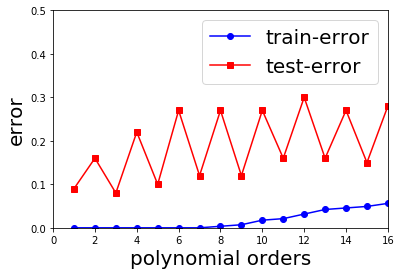

In [17]:
plt.plot(model.df["degree"],1-model.df["train_acc"],marker="o",c='blue',label="train-error")
plt.plot(model.df["degree"],1-model.df["test_acc"],marker="s",c='red',label="test-error")
plt.ylabel("error",size =20)
plt.xlabel("polynomial orders",size =20)
plt.xlim(0,16)
plt.ylim(0,0.5)
plt.legend(fontsize=20)
plt.show()